In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns

%matplotlib inline
sns.set(style="darkgrid")
sns.set_context("notebook")
rcParams["figure.figsize"] = 10, 5

In [2]:
# load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


**Intial Observations** - The train dataset has 550,068 observations and 11 features. The test dataset contains 233,599 observations and 11 features. In both the cases, Product_Category_2 and Product_Category_3 seem to be missing a whole lot of values.

## EDA

#### Gender

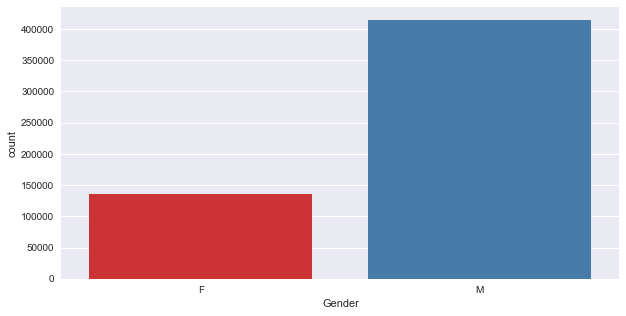

In [7]:
sns.countplot(x="Gender", palette="Set1", data=train_df)
plt.savefig("gender-train.jpeg", dpi=200)
plt.show()

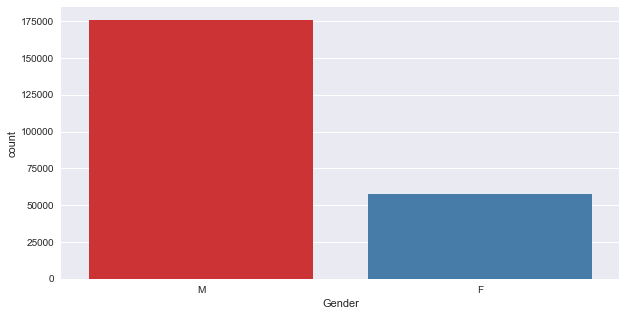

In [8]:
sns.countplot(x="Gender", palette="Set1", data=test_df)
plt.savefig("gender-test.jpeg", dpi=200)
plt.show()

**Observation** - An overwhelming majority are Male customers

#### Age Group

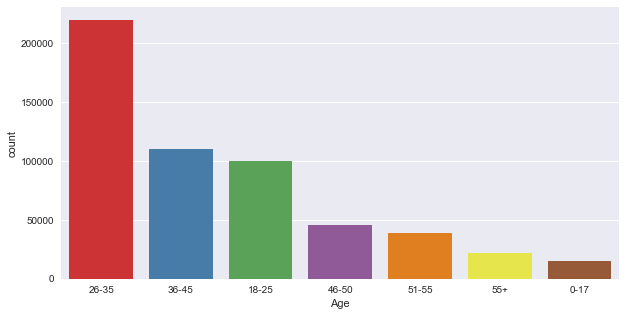

In [9]:
sns.countplot(x="Age", palette="Set1", data=train_df, order=train_df["Age"].value_counts().index)
plt.savefig("age_groups.jpeg", dpi=200)
plt.show()

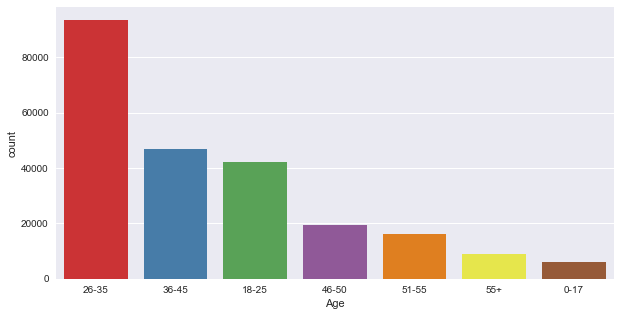

In [10]:
sns.countplot(x="Age", palette="Set1", data=test_df, order=test_df["Age"].value_counts().index)
plt.show()

**Observation** - Very similar distributions for both datasets. Age group 26-35 is dominant in both follow by 36-45 and 18-25

#### Occupation

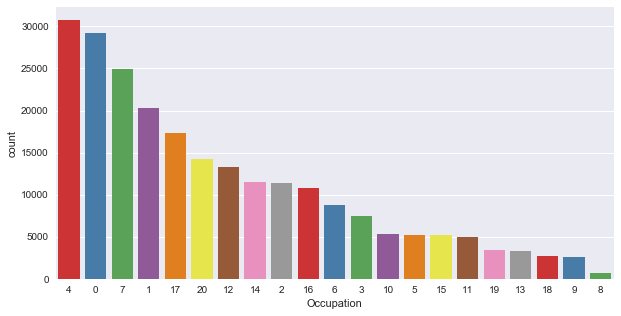

In [11]:
sns.countplot(x="Occupation", palette="Set1", data=test_df, order=train_df["Occupation"].value_counts().index)
plt.show()

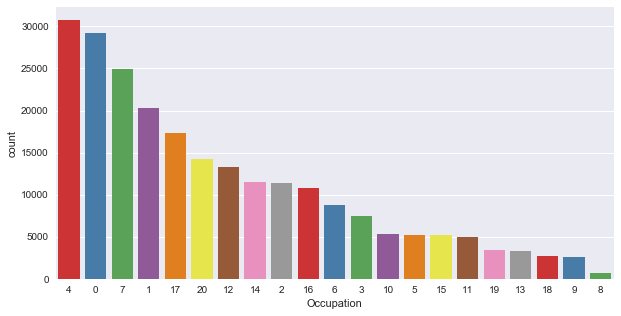

In [12]:
sns.countplot(x="Occupation", palette="Set1", data=test_df, order=test_df["Occupation"].value_counts().index)
plt.show()

**Observation** - Again, similar distributions, but this feature is masked, so there isn't much we can do on initial observation

#### City Category

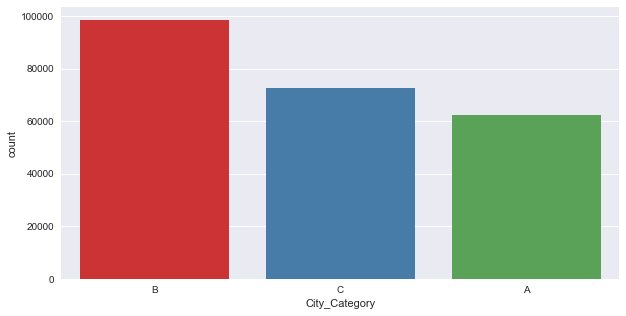

In [13]:
sns.countplot(x="City_Category", palette="Set1", data=test_df, order=train_df["City_Category"].value_counts().index)
plt.show()

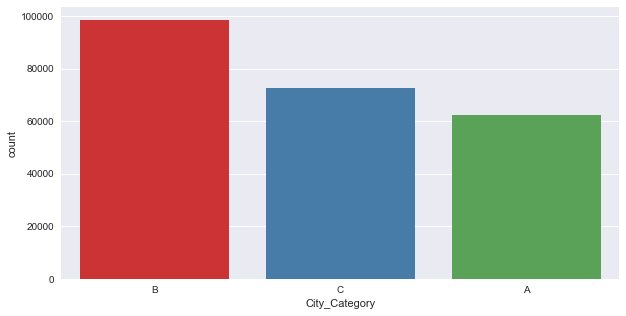

In [14]:
sns.countplot(x="City_Category", palette="Set1", data=test_df, order=test_df["City_Category"].value_counts().index)
plt.show()

**0bservation** - Again the category is masked, with city-B leading the numbers

#### Stay in Current City - Years

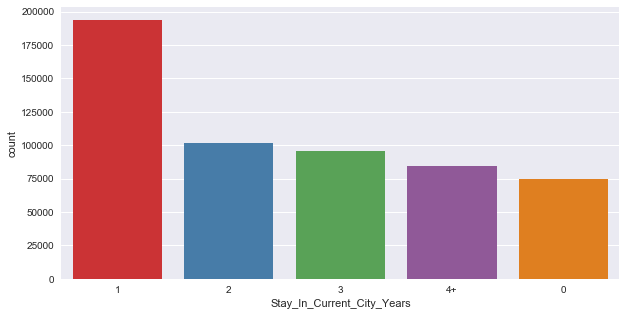

In [15]:
sns.countplot(x="Stay_In_Current_City_Years", palette="Set1", data=train_df, order=train_df["Stay_In_Current_City_Years"].value_counts().index)
plt.show()

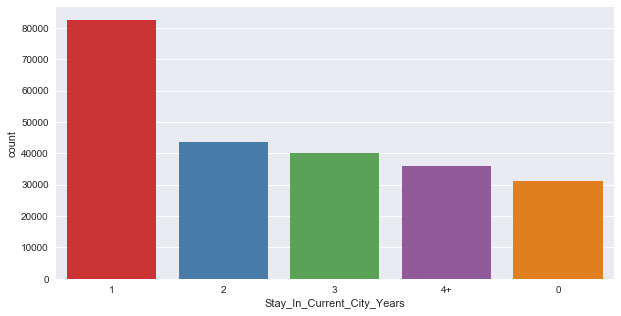

In [16]:
sns.countplot(x="Stay_In_Current_City_Years", palette="Set1", data=test_df, order=test_df["Stay_In_Current_City_Years"].value_counts().index)
plt.savefig("stay.jpeg", dpi=200)
plt.show()

**Observation** - Interestingly, the majority of the info seems to be collected from people who've stayed in the city for 1 year or less. Purchase patterns of people who've stayed in the city for "0" years need to be checked.

#### Marital Status

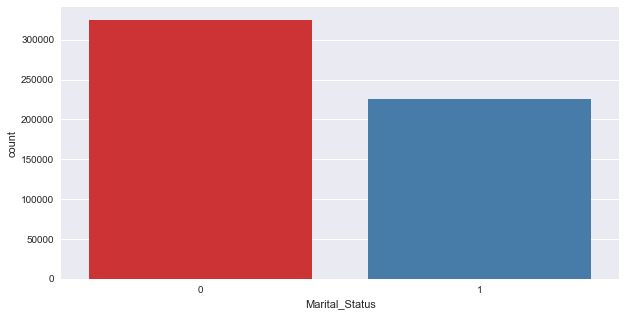

In [17]:
sns.countplot(x="Marital_Status", palette="Set1", data=train_df, order=train_df["Marital_Status"].value_counts().index)
plt.show()

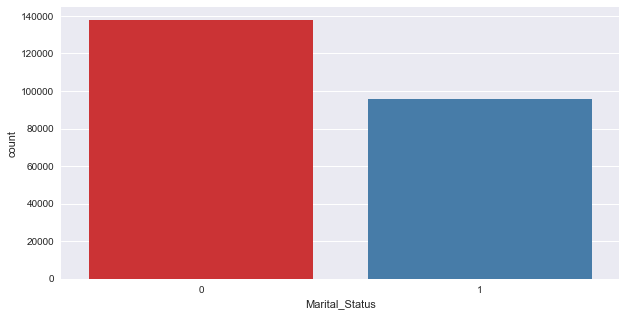

In [18]:
sns.countplot(x="Marital_Status", palette="Set1", data=test_df, order=test_df["Marital_Status"].value_counts().index)
plt.show()

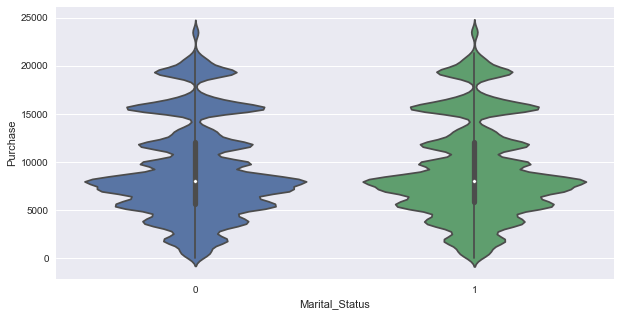

In [19]:
sns.violinplot(x="Marital_Status", y="Purchase", data=train_df)
plt.savefig("marital_purchase.jpeg", dpi=200)
plt.show()

**Observation** - Similar distributions again, with non-married people dominating the number of users. Purchase amount might show an inverse of this.

#### User_ID

In [20]:
train_df["User_ID"].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
1002909     718
1001449     714
1002063     709
1004344     705
1003391     698
1003841     698
1000424     694
1004510     691
1001980     685
1001088     680
1004227     676
1003808     671
1004508     651
1000549     632
1003224     622
1003539     617
1005367     612
1001285     606
1004543     588
1003824     584
           ... 
1001318       9
1004178       9
1004464       9
1005043       9
1003388       9
1003883       9
1005117       9
1002160       9
1002893       9
1002061       9
1004068       9
1002037       9
1004527       8
1003291       8
1002965       8
1002488       8
1000320       8
1003542       8
1002135       8
1003275       8
1005904       8
1004192       8
1005810       7
1005391       7
1002690       7
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5

In [21]:
train_df["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
P00278642    1226
P00242742    1215
P00034742    1212
P00148642    1204
P00080342    1203
P00031042    1200
P00028842    1197
P00251242    1187
P00114942    1178
P00000142    1152
             ... 
P00314842       1
P00353042       1
P00335642       1
P00022042       1
P00314742       1
P00353742       1
P00365942       1
P00069642       1
P00204042       1
P00238842       1
P00142542       1
P00167242       1
P00104042       1
P00340742       1
P00060842       1
P00339142       1
P00068742       1
P00275042       1
P00156642       1
P00206242       1
P00203942       1
P00077542       1
P00285142       1
P00167342       1
P00056542 

**Observation** - As you can see, there are many instances of the same user_id and product_id. A possible feature thatn can be created is the user count and product count

In [9]:
for i in range(0,100,10):
    var = train_df["Purchase"].values
    var = np.sort(var, axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 12
10 percentile value is 3540
20 percentile value is 5266
30 percentile value is 6136
40 percentile value is 7150
50 percentile value is 8047
60 percentile value is 8900
70 percentile value is 11528
80 percentile value is 15165
90 percentile value is 16317
100 percentile value is  23961


In [10]:
for i in range(90,100):
    var = train_df["Purchase"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 16317
91 percentile value is 16575
92 percentile value is 18292
93 percentile value is 19052
94 percentile value is 19194
95 percentile value is 19336
96 percentile value is 19480
97 percentile value is 19628
98 percentile value is 20203
99 percentile value is 20665
100 percentile value is  23961


**Observation** - There is a little bit of jump from the 99th to 100 th percentile. Curbing values there might help with favourable RMSE values

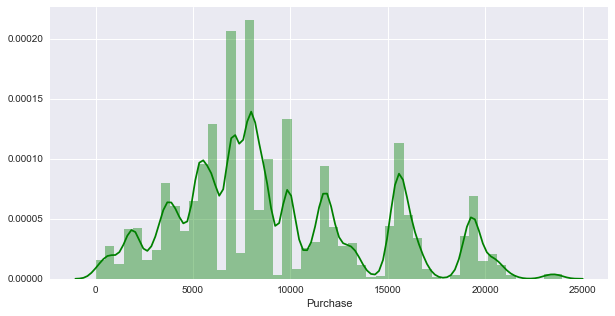

In [22]:
sns.distplot(train_df["Purchase"], color="g")
#sns.despine()
plt.show()

## Cleaning the Dataset

In [7]:
import copy
user_id = copy.deepcopy(test_df["User_ID"])
prod_id = copy.deepcopy(test_df["Product_ID"])

In [8]:
#product_cat_3
train_df["Product_Category_3"].fillna(9999, inplace=True)
test_df["Product_Category_3"].fillna(9999, inplace=True)

train_df["Product_Category_2"].fillna(9999, inplace=True)
test_df["Product_Category_2"].fillna(9999, inplace=True)

In [9]:
#removing P from Product_ID
train_df["Product_ID"] = train_df["Product_ID"].str.replace("P", "")
test_df["Product_ID"] = test_df["Product_ID"].str.replace("P", "")

# for XGB
train_df["Product_ID"] = train_df["Product_ID"].astype(str).astype(int)
test_df["Product_ID"] = test_df["Product_ID"].astype(str).astype(int)

In [10]:
# gender
train_df = pd.concat([train_df, pd.get_dummies(train_df["Gender"], prefix="gen_")], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df["Gender"], prefix="gen_")], axis=1)

In [11]:
#city category
train_df = pd.concat([train_df, pd.get_dummies(train_df["City_Category"], prefix="city_")], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df["City_Category"], prefix="city_")], axis=1)

In [12]:
#stay in city
train_df["Stay_In_Current_City_Years"] = train_df["Stay_In_Current_City_Years"].map({"0": 1, "1": 2, "2": 3,
                                                                                     "3": 4, "4+": 10})
test_df["Stay_In_Current_City_Years"] = test_df["Stay_In_Current_City_Years"].map({"0": 1, "1": 2, "2": 3, 
                                                                                   "3": 4, "4+": 10})

In [13]:
#age
train_df["Age"] = train_df["Age"].map({"0-17": 17, "18-25": 25, "26-35": 35, "36-45": 45, "46-50": 
                                       50, "51-55": 55, "55+": 70})
test_df["Age"] = test_df["Age"].map({"0-17": 17, "18-25": 25, "26-35": 35, "36-45": 45, "46-50": 
                                     50, "51-55": 55, "55+": 70})

In [14]:
train_df.drop(["Gender", "City_Category"], axis=1, inplace=True)
test_df.drop(["Gender", "City_Category"], axis=1, inplace=True)

In [15]:
# cutting off purchase
cutoff_purchase = np.percentile(train_df['Purchase'], 99)  # 99th percentile
train_df.loc[train_df['Purchase'] > cutoff_purchase, 'Purchase'] = cutoff_purchase

In [16]:
# imputing by modelling
"""
data_with_prod2 = test_df[test_df["Product_Category_2"].notnull()]
data_without_prod2 = test_df[test_df["Product_Category_2"].isnull()]

data_without_prod2.drop("Product_Category_2", axis=1, inplace=True)

test_y_prod2 = data_with_prod2["Product_Category_2"]
test_x_prod2 = data_with_prod2.drop("Product_Category_2", axis=1)

model_prod2.fit(test_x_prod2, test_y_prod2)

y_pred = model_prod2.predict(data_without_prod2)

test_df.loc[test_df["Product_Category_2"].isnull(), "Product_Category_2"] = y_pred
"""

'\ndata_with_prod2 = test_df[test_df["Product_Category_2"].notnull()]\ndata_without_prod2 = test_df[test_df["Product_Category_2"].isnull()]\n\ndata_without_prod2.drop("Product_Category_2", axis=1, inplace=True)\n\ntest_y_prod2 = data_with_prod2["Product_Category_2"]\ntest_x_prod2 = data_with_prod2.drop("Product_Category_2", axis=1)\n\nmodel_prod2.fit(test_x_prod2, test_y_prod2)\n\ny_pred = model_prod2.predict(data_without_prod2)\n\ntest_df.loc[test_df["Product_Category_2"].isnull(), "Product_Category_2"] = y_pred\n'

In [17]:
train_df.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gen__F,gen__M,city__A,city__B,city__C
0,1000001,69042,17,10,3,0,3,9999.0,9999.0,8370.0,1,0,1,0,0
1,1000001,248942,17,10,3,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,1000001,87842,17,10,3,0,12,9999.0,9999.0,1422.0,1,0,1,0,0
3,1000001,85442,17,10,3,0,12,14.0,9999.0,1057.0,1,0,1,0,0
4,1000002,285442,70,16,10,0,8,9999.0,9999.0,7969.0,0,1,0,0,1


In [18]:
test_df.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,gen__F,gen__M,city__A,city__B,city__C
0,1000004,128942,50,7,3,1,1,11.0,9999.0,0,1,0,1,0
1,1000009,113442,35,17,1,0,3,5.0,9999.0,0,1,0,0,1
2,1000010,288442,45,1,10,1,5,14.0,9999.0,1,0,0,1,0
3,1000010,145342,45,1,10,1,4,9.0,9999.0,1,0,0,1,0
4,1000011,53842,35,1,2,0,4,5.0,12.0,1,0,0,0,1


## Preparing the dataset

In [19]:
y_train = train_df["Purchase"]
X_train = train_df.drop("Purchase", axis=1)

X_test = test_df

## Cross Validation

In [24]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [22]:
#rf
kf = KFold(n_splits=5)
rf_model = RandomForestRegressor(random_state=7)
scores = cross_val_score(rf_model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf)
x = scores.mean()
x

-7774597.6794529501

In [23]:
sqrt(-x)

2788.2965551484926

## Model

In [20]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimator=500, max_depth=12, random_state=13, eta=0.2, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
submission = pd.DataFrame()
submission["User_ID"] = user_id
submission["Product_ID"] = prod_id
submission["Purchase"] = y_pred
submission.to_csv("sub_final.csv", index=False)